In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score          # 准确率
from sklearn.metrics import confusion_matrix        # 混淆矩阵
from sklearn.metrics import classification_report   # 得出各种评价，精确率，召回率，F1分值等
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('./data/股票客户流失.xlsx')

In [11]:
df.head()

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,累计交易佣金（元）,本券商使用时长（年）,是否流失
0,22686.5,297,149.25,2029.85,0,0
1,190055.0,42,284.75,3889.50,2,0
2,29733.5,233,269.25,2108.15,0,1
3,185667.5,44,211.50,3840.75,3,0
4,33648.5,213,353.50,2151.65,0,1


In [3]:
X = df.drop(columns='是否流失')
y = df['是否流失']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [34]:
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)

In [7]:
score = accuracy_score(y_pred, y_test)
score

0.7977288857345636

In [18]:
print(f'coef: {model.coef_}')

coef: [[ 2.41952469e-05  8.16881491e-03  1.04320950e-02 -2.54894468e-03
  -1.10120609e-04]]


In [19]:
m = confusion_matrix(y_test, y_pred)
m

array([[968,  93],
       [192, 156]])

In [20]:
a = pd.DataFrame(m, index=['0(实际不流失)', '1(实际流失)'], columns=['0(预测不流失)', '1(预测流失)'])
a

,0(预测不流失),1(预测流失)
0(实际不流失),968,93
1(实际流失),192,156


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.63      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



In [21]:
156 / (156 + 192)

0.4482758620689655

In [13]:
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])

$$TPR = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{FP + TN}$$

In [14]:
a = pd.DataFrame()
a['阈值'] = thres
a['假报警率'] = fpr
a['召回率'] = tpr

In [15]:
a
# 阈值表示，只有当把样本被判定为1（正例）的概率大于该值时，才判断其为1

,阈值,假报警率,召回率
0,1.930369,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230
...,...,...,...
373,0.034940,0.918944,0.994253
374,0.034861,0.918944,0.997126
375,0.032088,0.932139,0.997126
376,0.032016,0.932139,1.000000


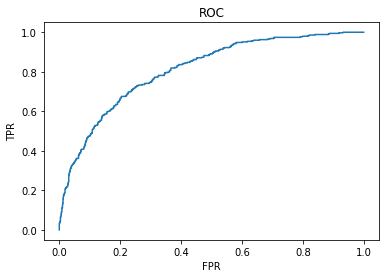

In [49]:
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [52]:
score = roc_auc_score(y_test, y_pred_proba[:, 1])
print(score)   # ROC曲线下的面积

0.8103854528908967
